# Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration
Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?

Which variables are the strongest predictors of default payment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
cred = pd.read_csv('UCI_Credit_Card.csv')
cred.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
cred.shape

(30000, 25)

In [4]:
# Renaming the columns
cred.columns = ["id", "limit_bal", "sex", "education", "martial_status","age", "pay_1", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "billamt_1", "billamt_2", "billamt_3", "billamt_4", "billamt_5", "billamt_6", "payamt_1", "payamt_2", "payamt_3", "payamt_4", "payamt_5", "payamt_6", "default_payment"]

In [5]:
cred.head()

id  limit_bal  sex  education  martial_status  age  pay_1  pay_2  pay_3  \
0   1    20000.0    2          2               1   24      2      2     -1   
1   2   120000.0    2          2               2   26     -1      2      0   
2   3    90000.0    2          2               2   34      0      0      0   
3   4    50000.0    2          2               1   37      0      0      0   
4   5    50000.0    1          2               1   57     -1      0     -1   

   pay_4  ...  billamt_4  billamt_5  billamt_6  payamt_1  payamt_2  payamt_3  \
0     -1  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   payamt_4  payamt_5  payamt_6  default_payment  
0       0.0       0.0       0.0                1  
1    1000.0       0.0    2000.0                1  
2    1000.0    1000.0    5000.0                0  
3    1100.0    1069.0    1000.0                0  
4    9000.0     689.0     679.0                0  

[5 rows x 25 columns]

In [6]:
cred.columns

Index(['id', 'limit_bal', 'sex', 'education', 'martial_status', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'billamt_1', 'billamt_2',
       'billamt_3', 'billamt_4', 'billamt_5', 'billamt_6', 'payamt_1',
       'payamt_2', 'payamt_3', 'payamt_4', 'payamt_5', 'payamt_6',
       'default_payment'],
      dtype='object')

In [7]:
# 5 - Point Summary of the dataset
cred.describe()

id       limit_bal           sex     education  \
count  30000.000000    30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133   
std     8660.398374   129747.661567      0.489129      0.790349   
min        1.000000    10000.000000      1.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000   

       martial_status           age         pay_1         pay_2         pay_3  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean         1.551867     35.485500     -0.016700     -0.133767     -0.166200   
std          0.521970      9.217904      1.123802      1.197186      1.196868   
min          0.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%          1.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%          2.000000     34.000000      0.000000      0.000000      0.000000   
75%          2.000000     41.000000      0.000000      0.000000      0.000000   
max          3.000000     79.000000      8.000000      8.000000      8.000000   

              pay_4  ...      billamt_4      billamt_5      billamt_6  \
count  30000.000000  ...   30000.000000   30000.000000   30000.000000   
mean      -0.220667  ...   43262.948967   40311.400967   38871.760400   
std        1.169139  ...   64332.856134   60797.155770   59554.107537   
min       -2.000000  ... -170000.000000  -81334.000000 -339603.000000   
25%       -1.000000  ...    2326.750000    1763.000000    1256.000000   
50%        0.000000  ...   19052.000000   18104.500000   17071.000000   
75%        0.000000  ...   54506.000000   50190.500000   49198.250000   
max        8.000000  ...  891586.000000  927171.000000  961664.000000   

            payamt_1      payamt_2      payamt_3       payamt_4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            payamt_5       payamt_6  default_payment  
count   30000.000000   30000.000000     30000.000000  
mean     4799.387633    5215.502567         0.221200  
std     15278.305679   17777.465775         0.415062  
min         0.000000       0.000000         0.000000  
25%       252.500000     117.750000         0.000000  
50%      1500.000000    1500.000000         0.000000  
75%      4031.500000    4000.000000         0.000000  
max    426529.000000  528666.000000         1.000000  

[8 rows x 25 columns]

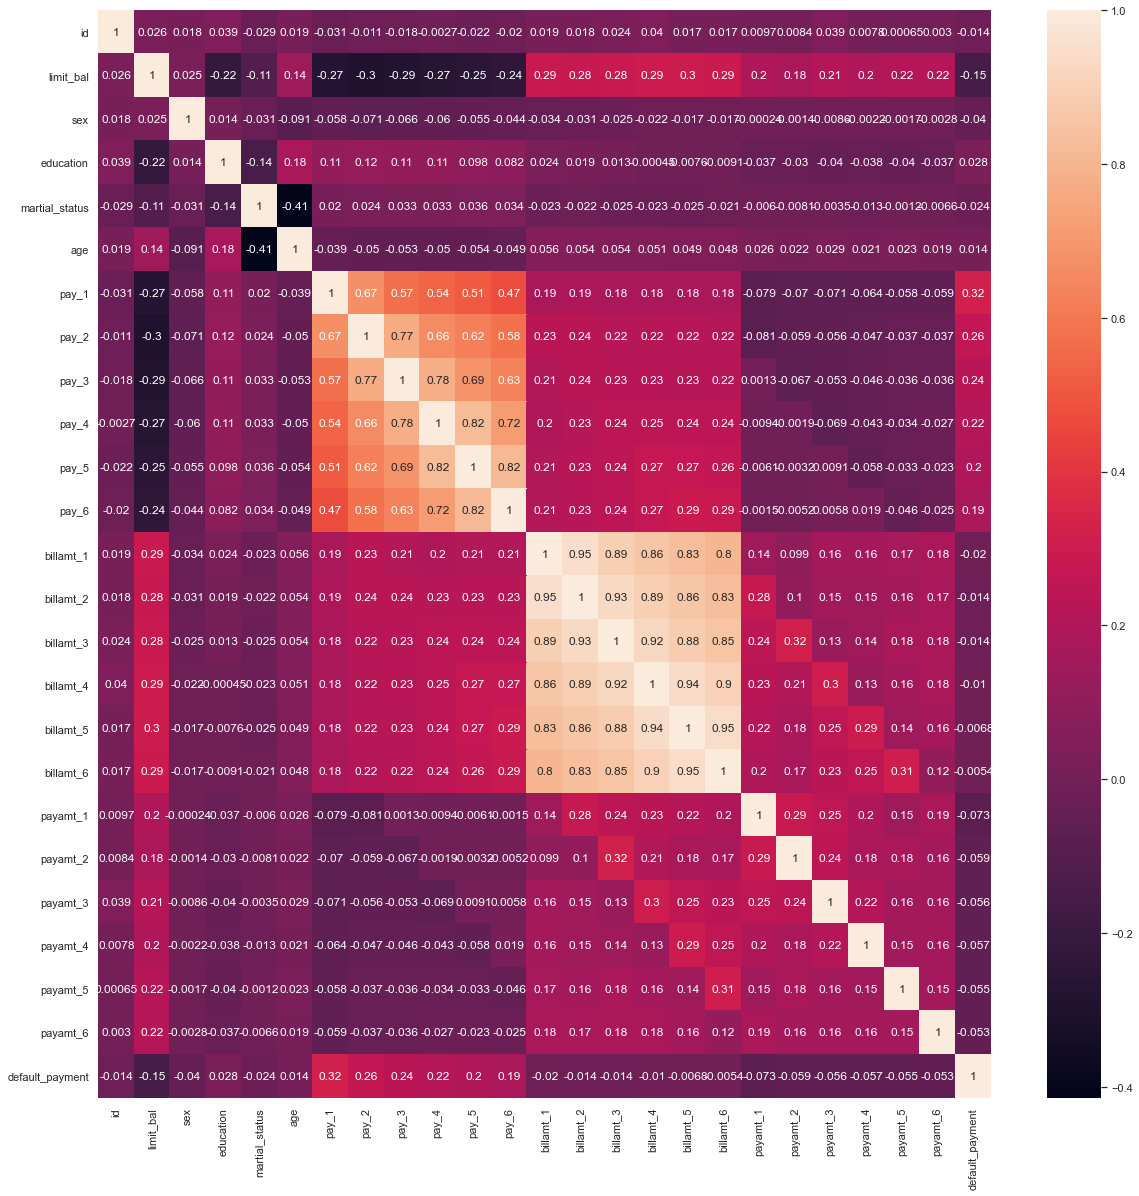

In [8]:
# Creating the heatmap
plt.figure(figsize = (20,20))
sns.heatmap(cred.corr(), annot = True)
plt.show()

In [9]:
cred.info() # we can see that there are only two datatypes i.e. float64 and int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30000 non-null  int64  
 1   limit_bal        30000 non-null  float64
 2   sex              30000 non-null  int64  
 3   education        30000 non-null  int64  
 4   martial_status   30000 non-null  int64  
 5   age              30000 non-null  int64  
 6   pay_1            30000 non-null  int64  
 7   pay_2            30000 non-null  int64  
 8   pay_3            30000 non-null  int64  
 9   pay_4            30000 non-null  int64  
 10  pay_5            30000 non-null  int64  
 11  pay_6            30000 non-null  int64  
 12  billamt_1        30000 non-null  float64
 13  billamt_2        30000 non-null  float64
 14  billamt_3        30000 non-null  float64
 15  billamt_4        30000 non-null  float64
 16  billamt_5        30000 non-null  float64
 17  billamt_6   

In [10]:
# To sort out different numerical variables.  
list1 = []
list2 = []
for i in cred:
    if cred[i].dtype == ('int64'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['id', 'sex', 'education', 'martial_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment']
['limit_bal', 'billamt_1', 'billamt_2', 'billamt_3', 'billamt_4', 'billamt_5', 'billamt_6', 'payamt_1', 'payamt_2', 'payamt_3', 'payamt_4', 'payamt_5', 'payamt_6']


## Visualization of the Dataset

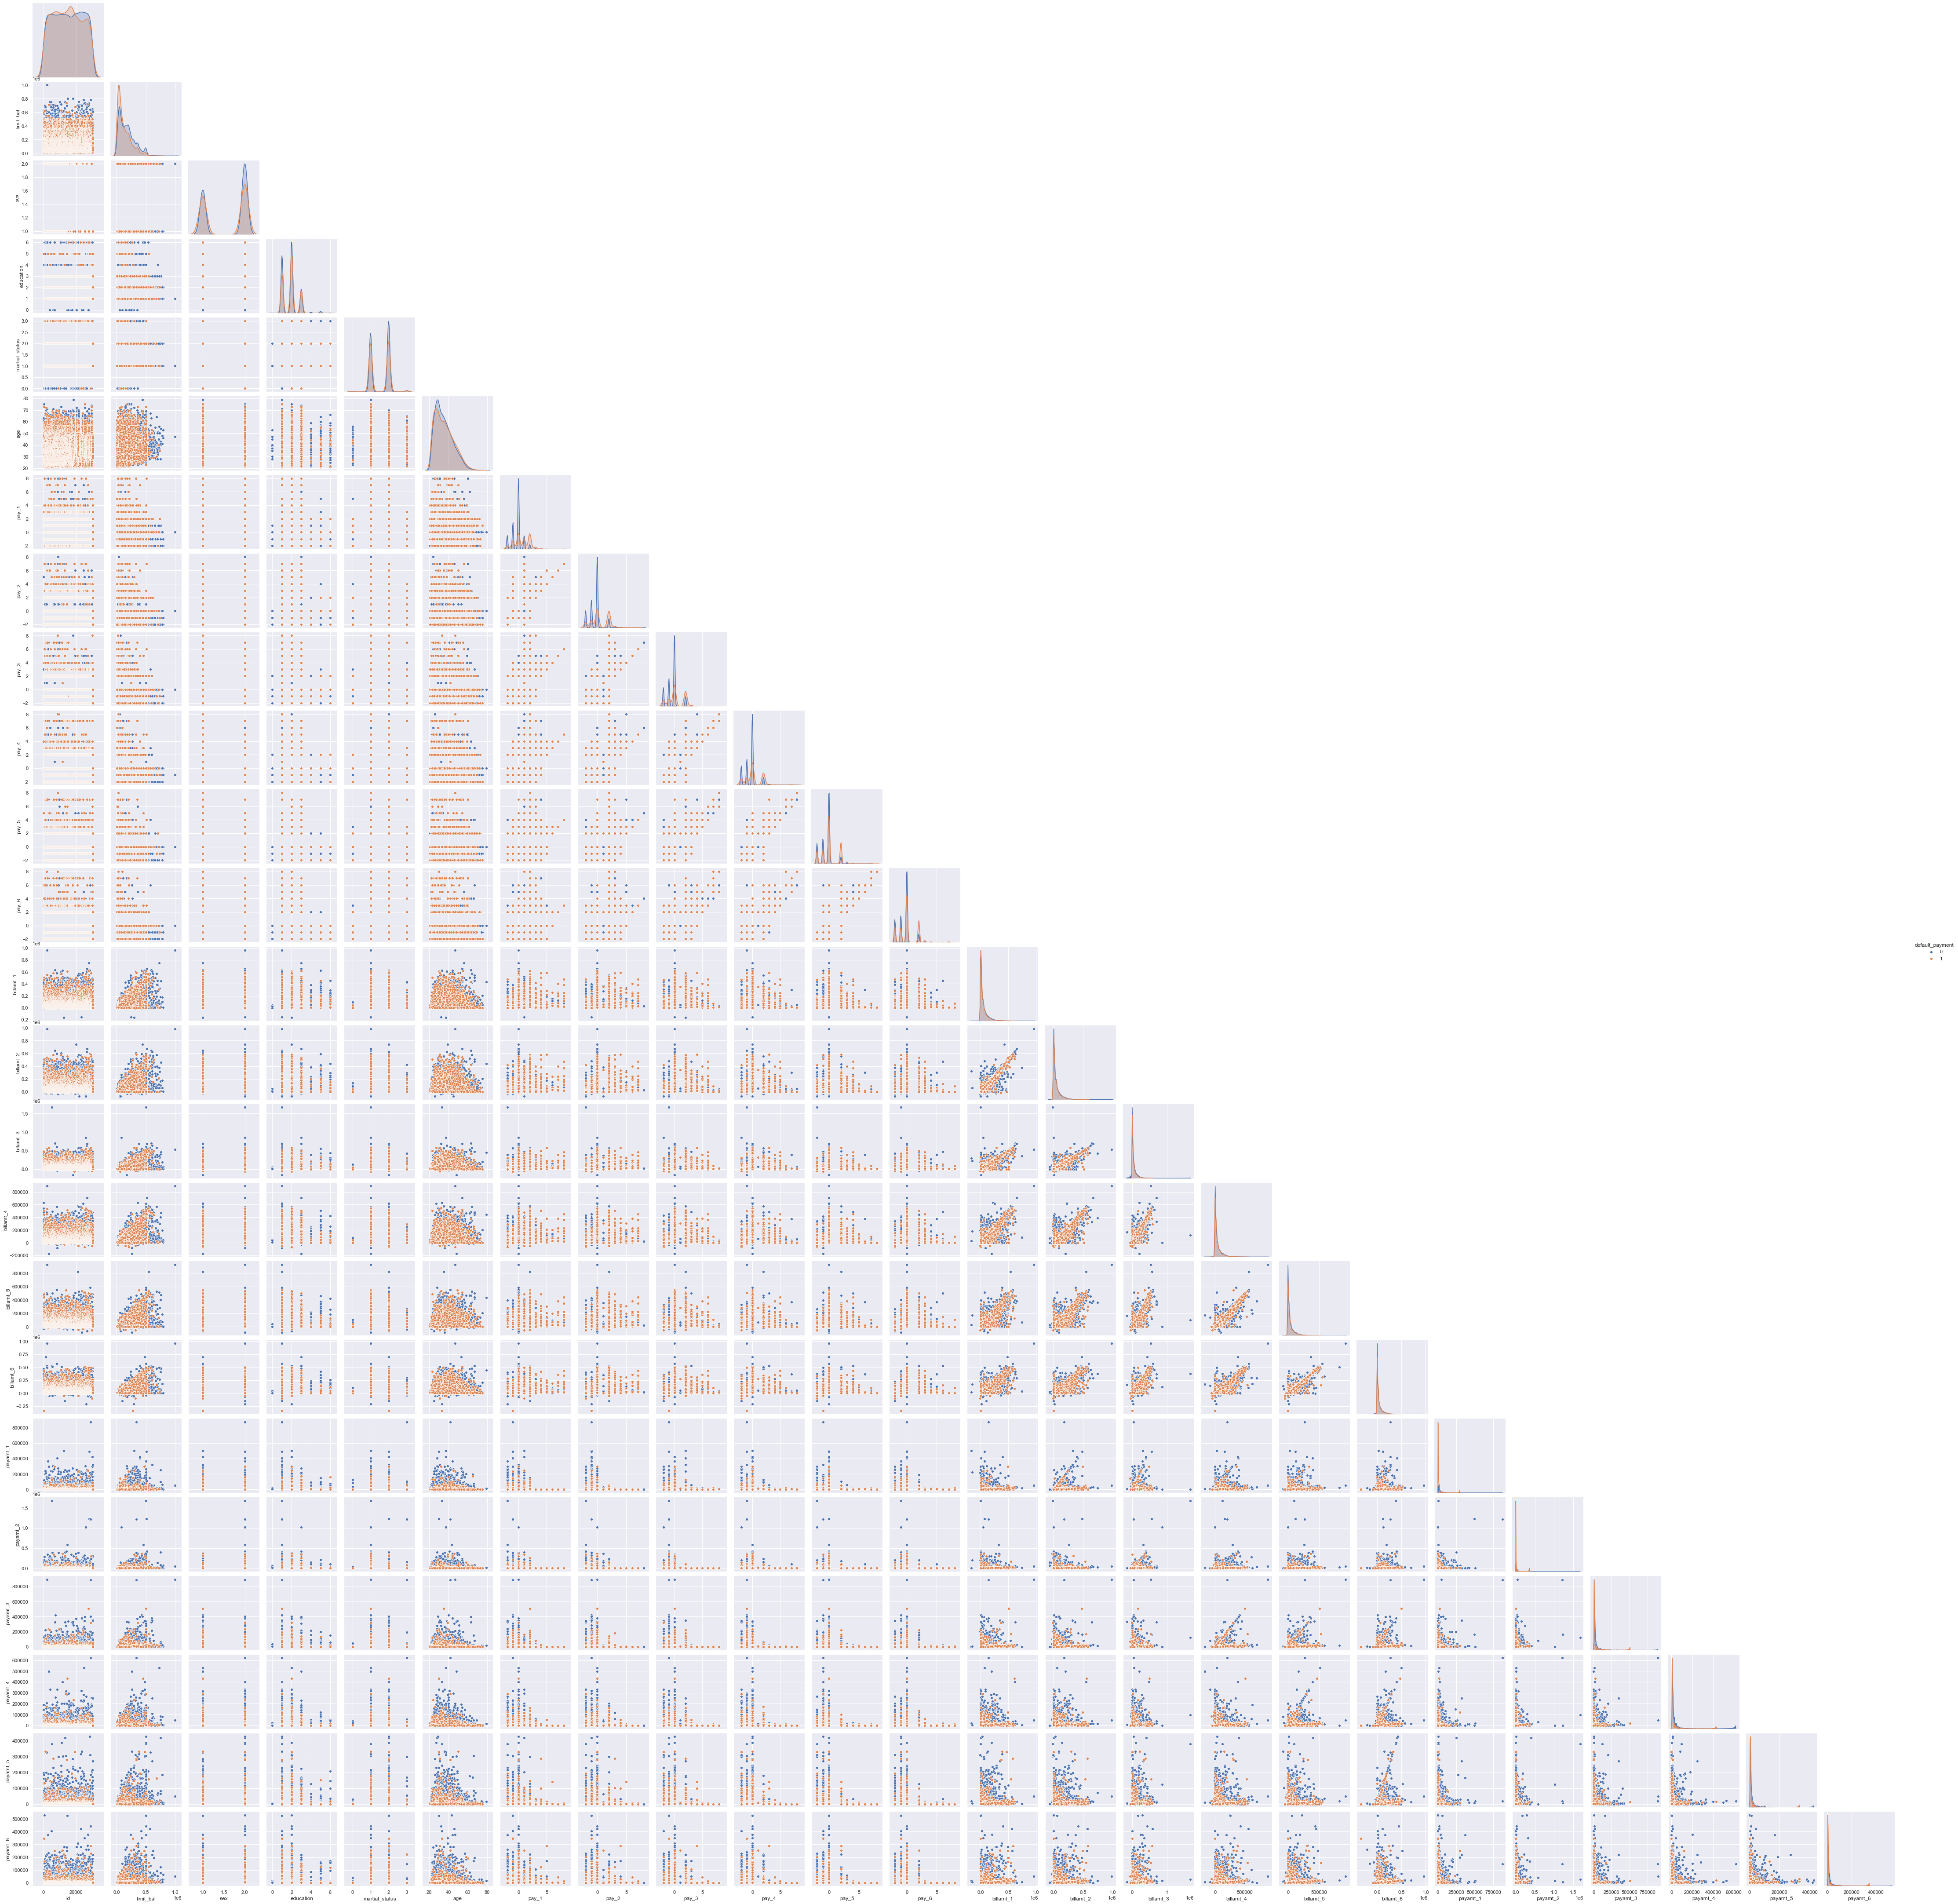

In [11]:
sns.pairplot(cred, hue="default_payment", corner = True, height = 2.5)
plt.show()

In [12]:
list1 = []
list2 = []
for i in cred:
    if cred[i].dtype == ('int64'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['id', 'sex', 'education', 'martial_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment']
['limit_bal', 'billamt_1', 'billamt_2', 'billamt_3', 'billamt_4', 'billamt_5', 'billamt_6', 'payamt_1', 'payamt_2', 'payamt_3', 'payamt_4', 'payamt_5', 'payamt_6']


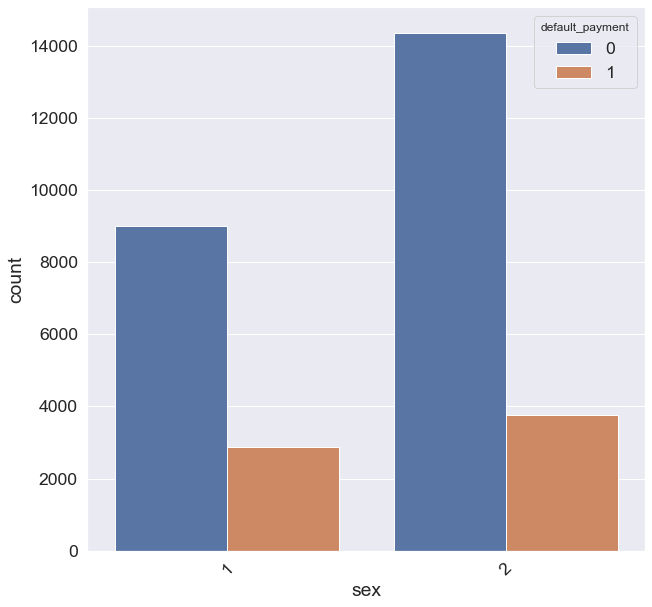

In [13]:
sns.set(font_scale=1.6)
plt.figure(figsize =(10,10))
sns.countplot(x = 'sex', data=cred, hue = cred["default_payment"])
plt.xticks(rotation = 45)
plt.show()

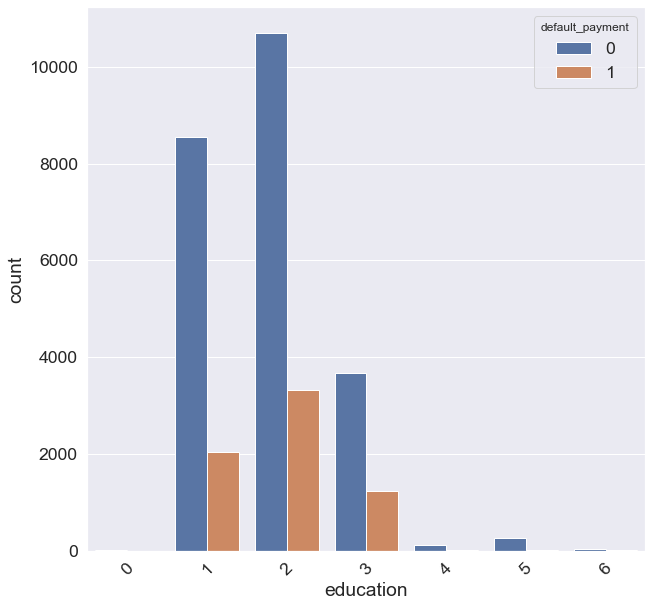

In [14]:
sns.set(font_scale=1.6)
plt.figure(figsize =(10,10))
sns.countplot(x = 'education', data=cred, hue = cred["default_payment"])
plt.xticks(rotation = 45)
plt.show()

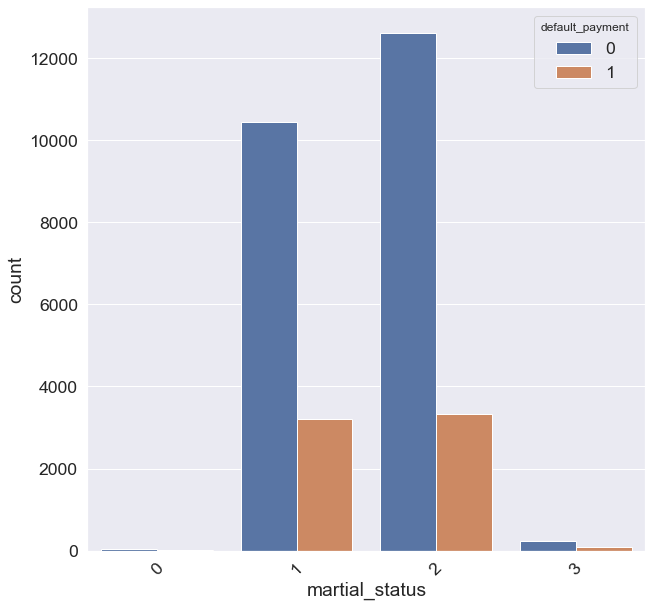

In [15]:
sns.set(font_scale=1.6)
plt.figure(figsize =(10,10))
sns.countplot(x = 'martial_status', data=cred, hue = cred["default_payment"])
plt.xticks(rotation = 45)
plt.show()

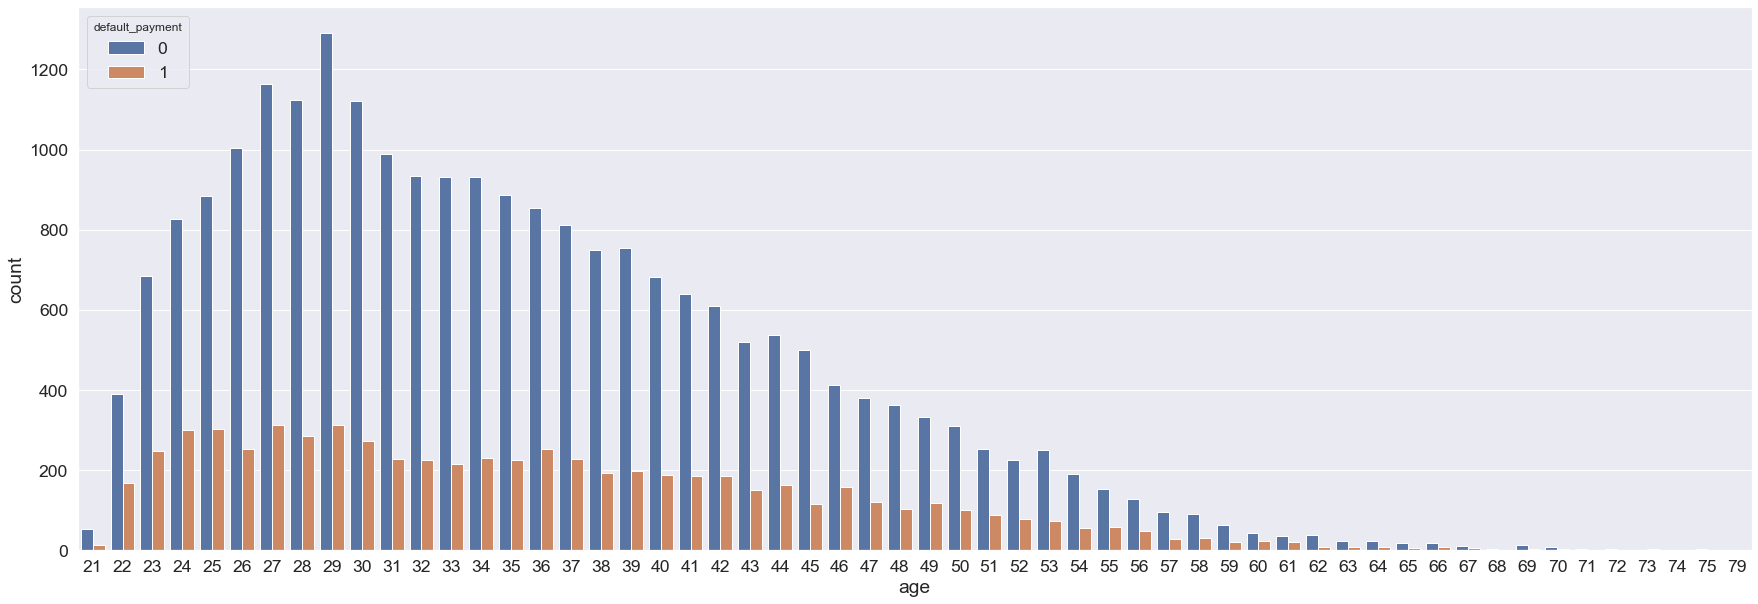

In [16]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(30,10))
sns.countplot(cred.age, hue = cred["default_payment"])
plt.show() 
# most of our customers are in their late twenties (age 26-29) and number of defaulters is also high for the same.

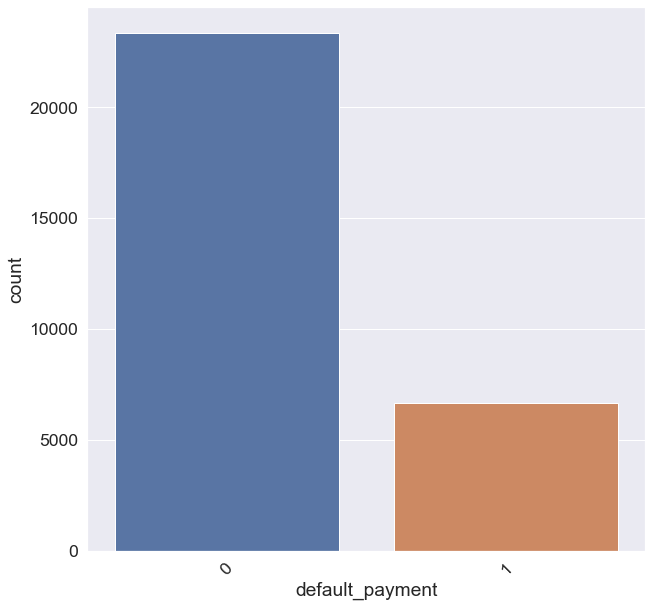

In [17]:
sns.set(font_scale=1.6)
plt.figure(figsize =(10,10))
sns.countplot(x = 'default_payment', data=cred)
plt.xticks(rotation = 45)
plt.show()

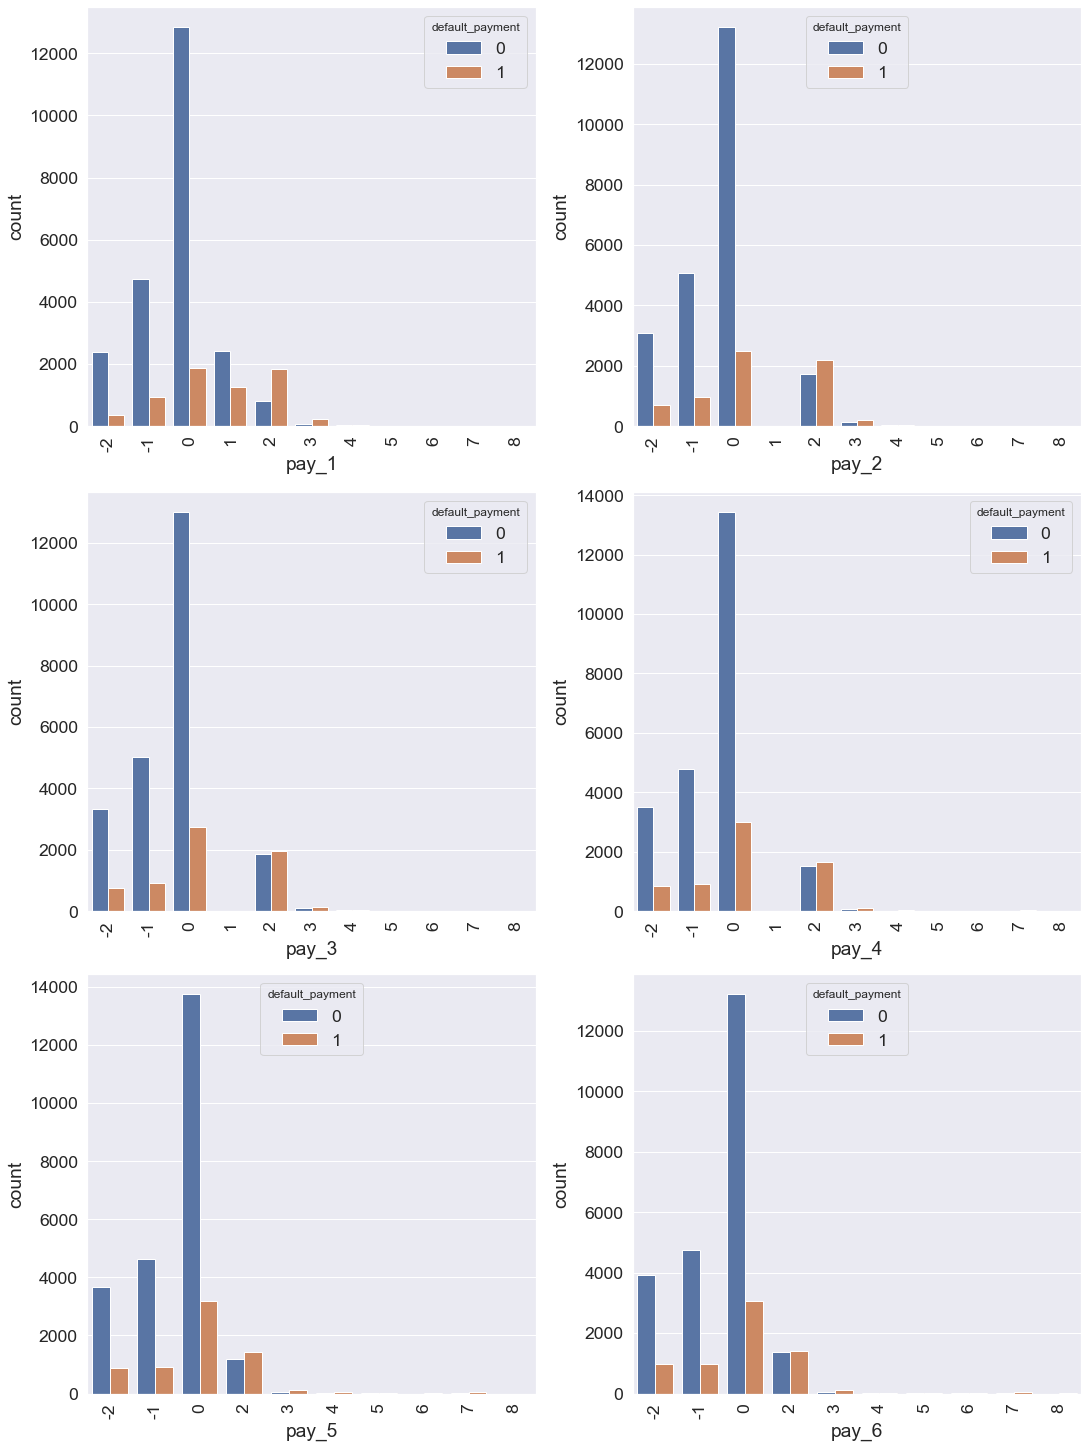

In [18]:
cat_col = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
fig, axes = plt.subplots(ncols =2 , nrows =3 , figsize = (15,20), constrained_layout = True)
for i, ax in zip(cat_col,axes.flat):
    chart = sns.countplot(cred[i], ax=ax, hue = cred["default_payment"])
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
plt.show()

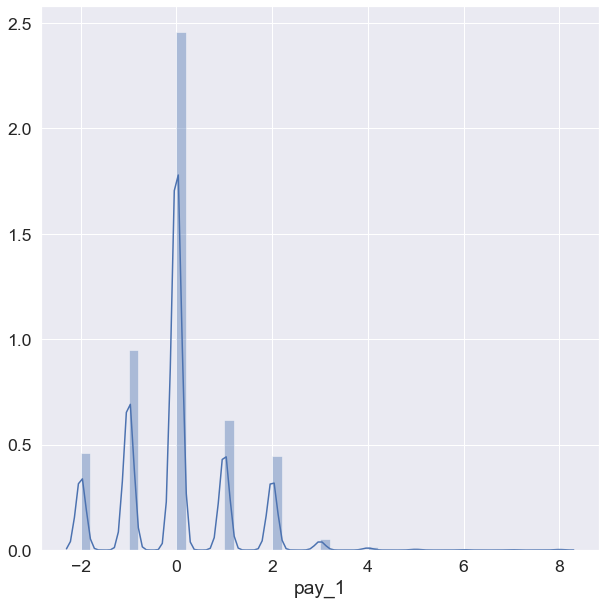

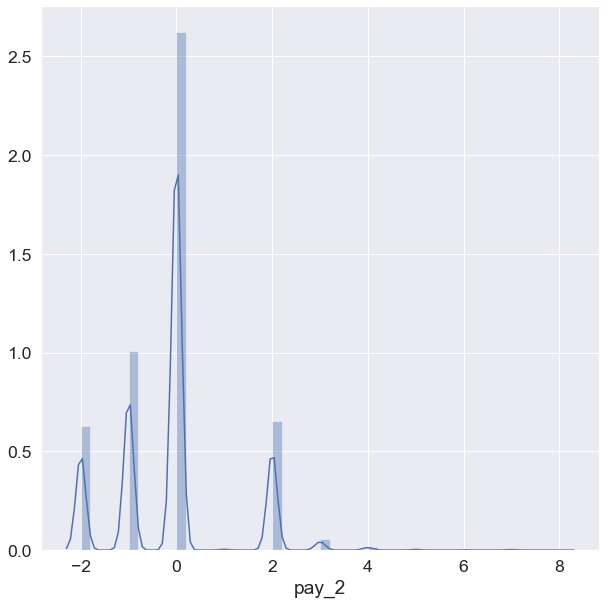

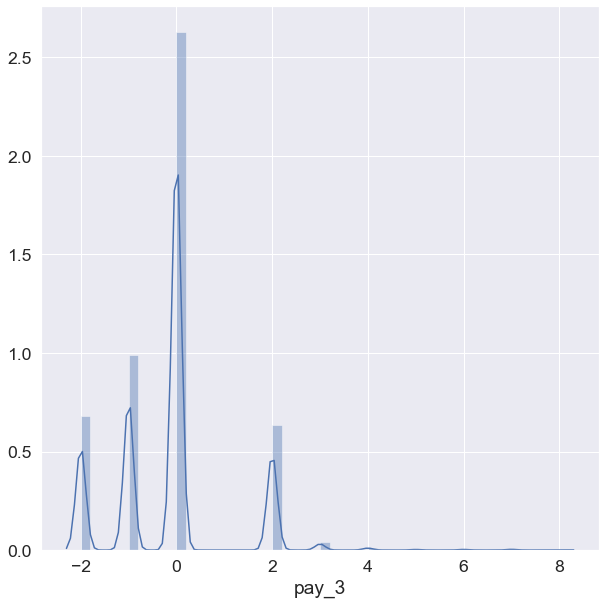

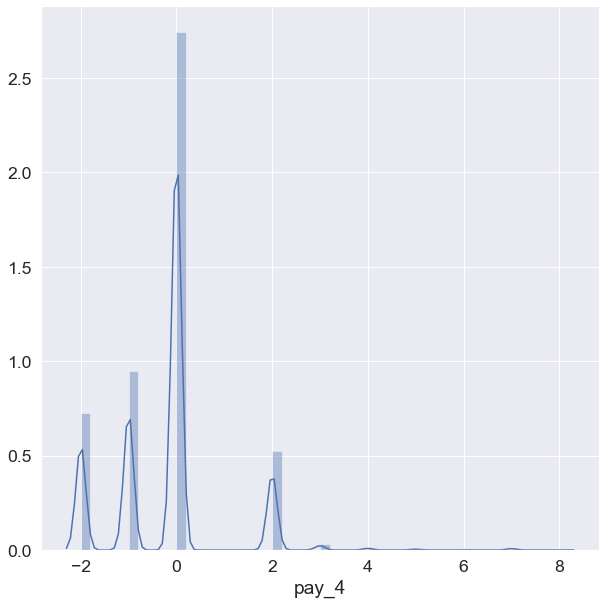

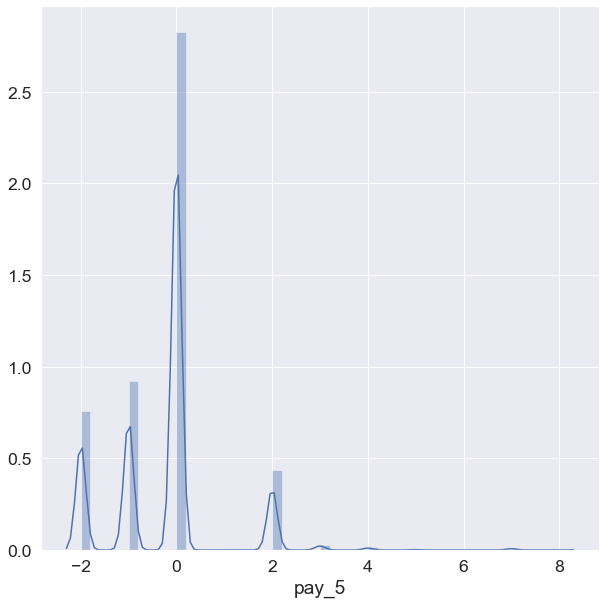

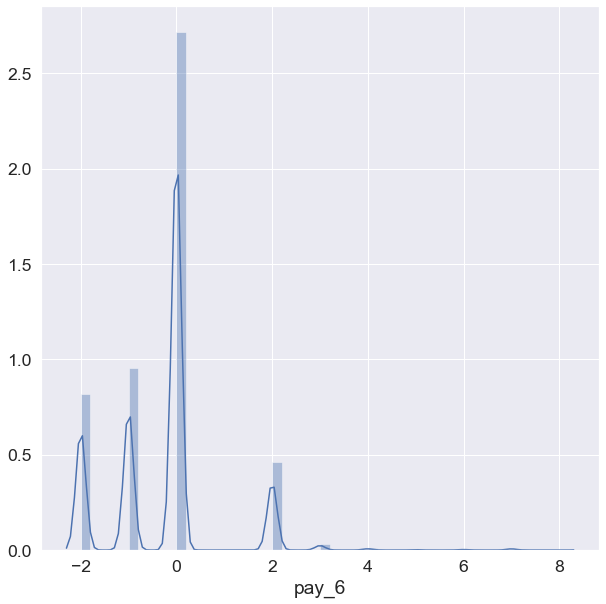

In [19]:
# KDEplot (Numerical) ['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize = (10,10))
sns.distplot(cred['pay_1'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['pay_2'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['pay_3'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['pay_4'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['pay_5'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['pay_6'], kde=True)
plt.show()
# most of the customers are have dual nature i.e.  one that customers are using credit card and  not repaying the amount within the same month and two many customers are not using their credit cards.
# Due to this there is higher peak for the zero value followed by peak of -1 value which means customers are paying in fully.
# Also we can see that there is payment delay at max for 2 months only in most cases.

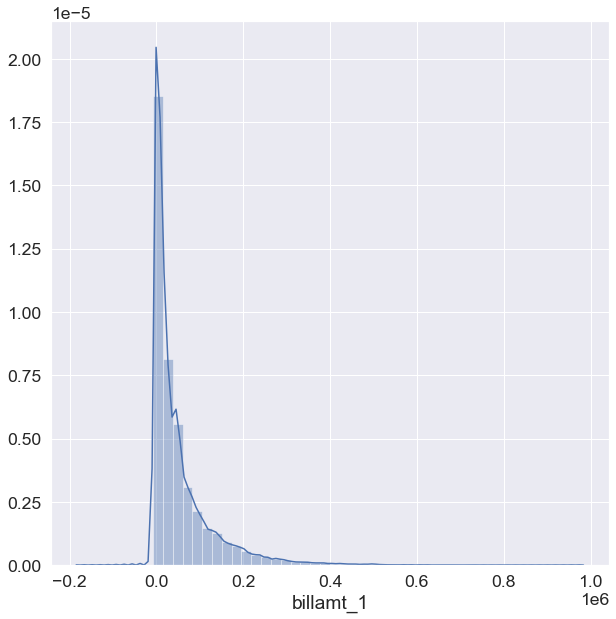

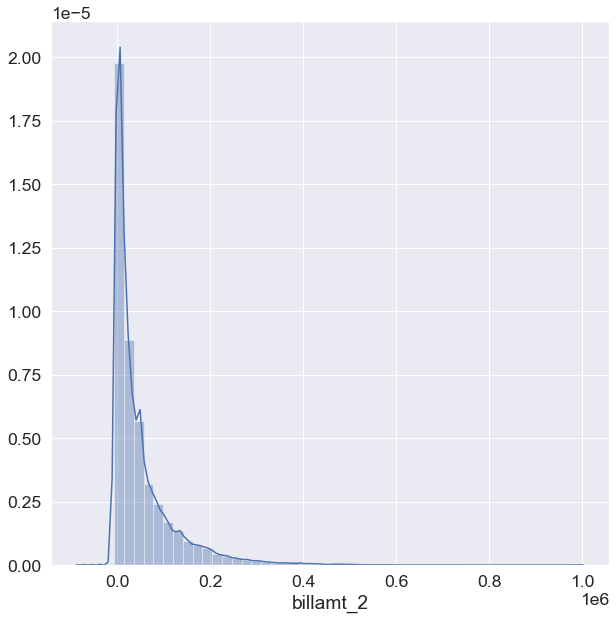

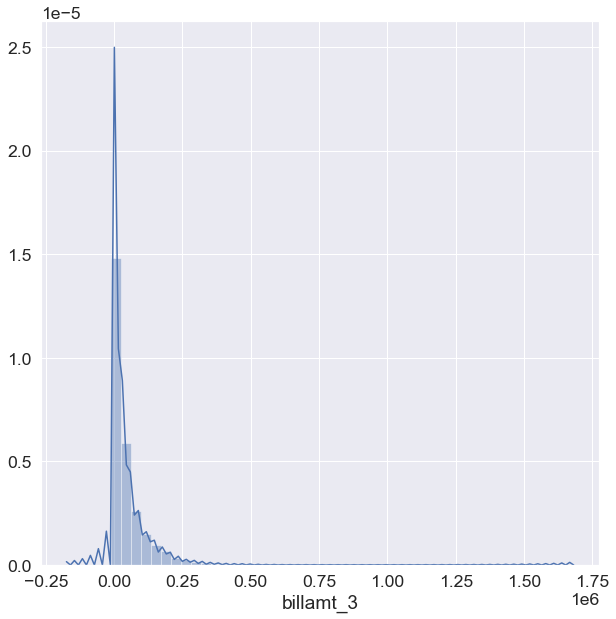

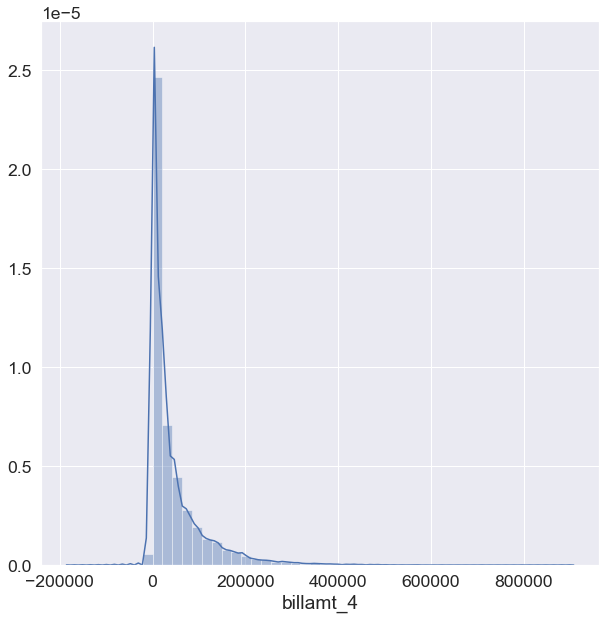

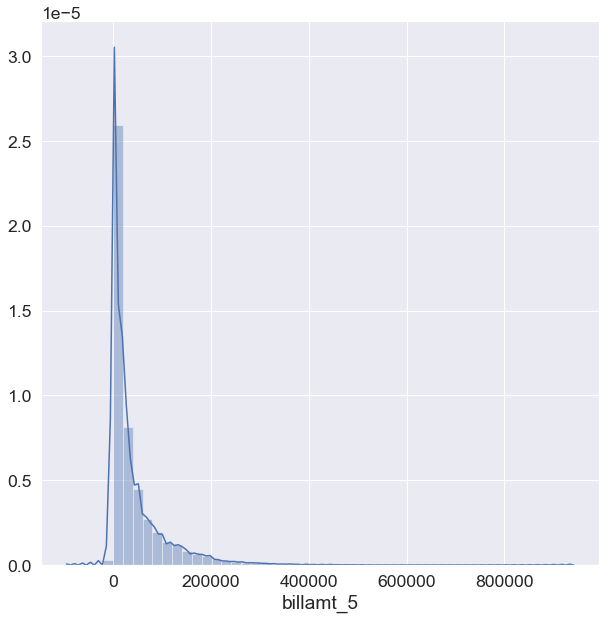

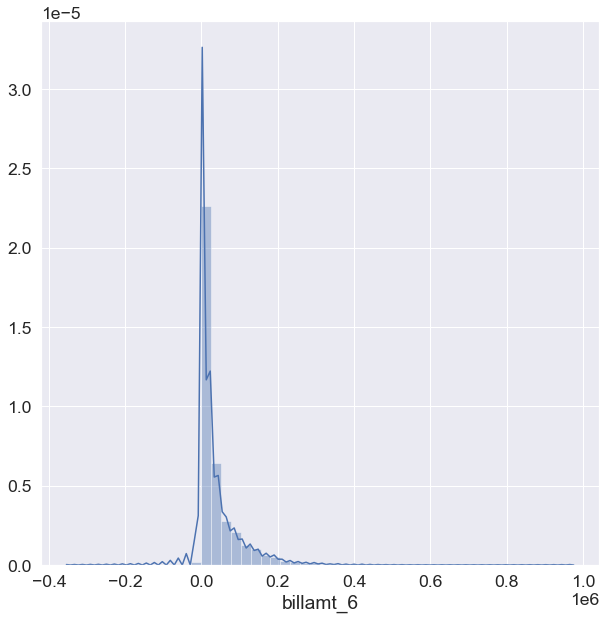

In [20]:
# ['billamt_1', 'billamt_2','billamt_3', 'billamt_4', 'billamt_5', 'billamt_6']
# most of the data is right skewed, scaling is required.
plt.figure(figsize = (10,10))
sns.distplot(cred['billamt_1'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['billamt_2'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['billamt_3'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['billamt_4'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['billamt_5'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['billamt_6'], kde=True)
plt.show()

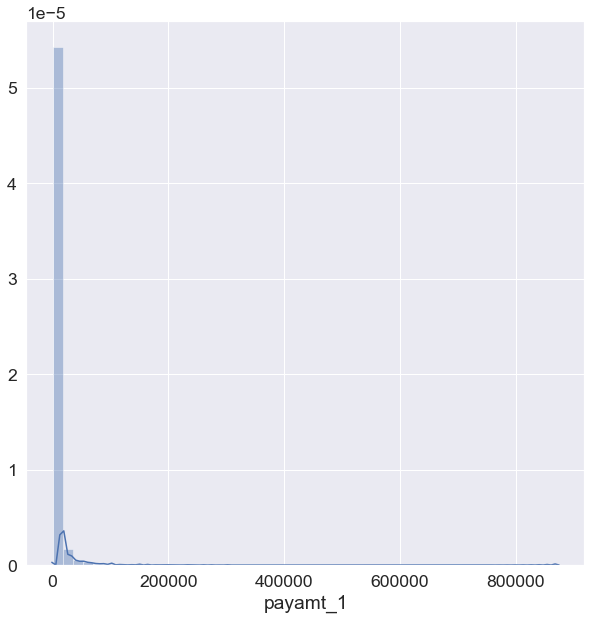

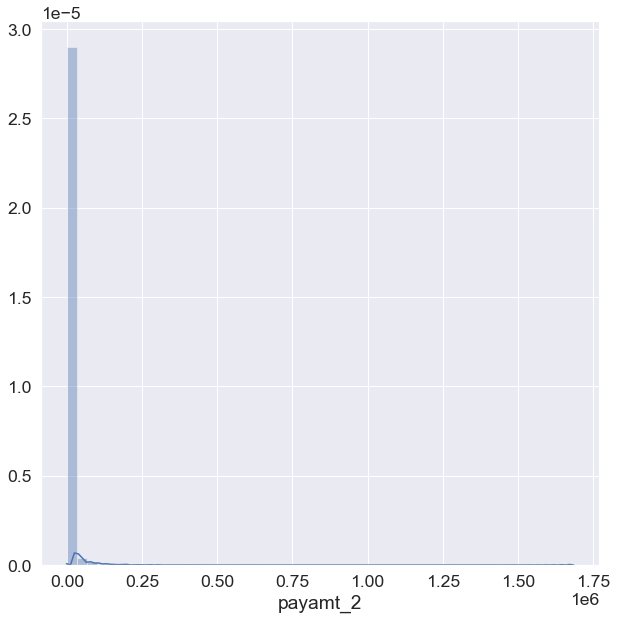

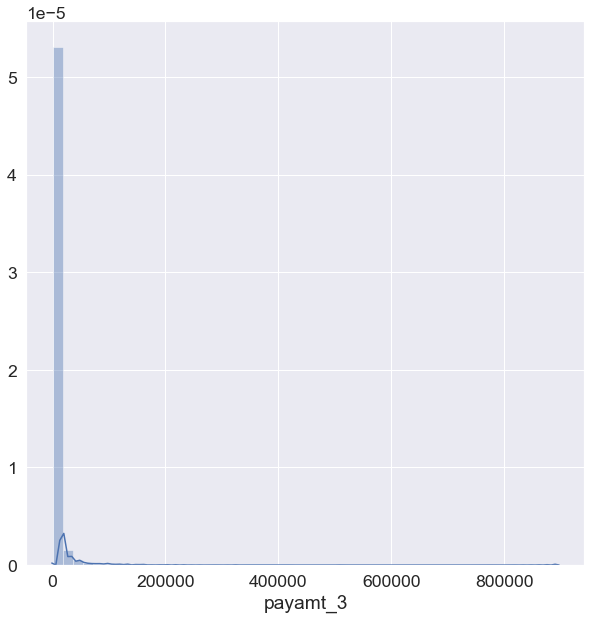

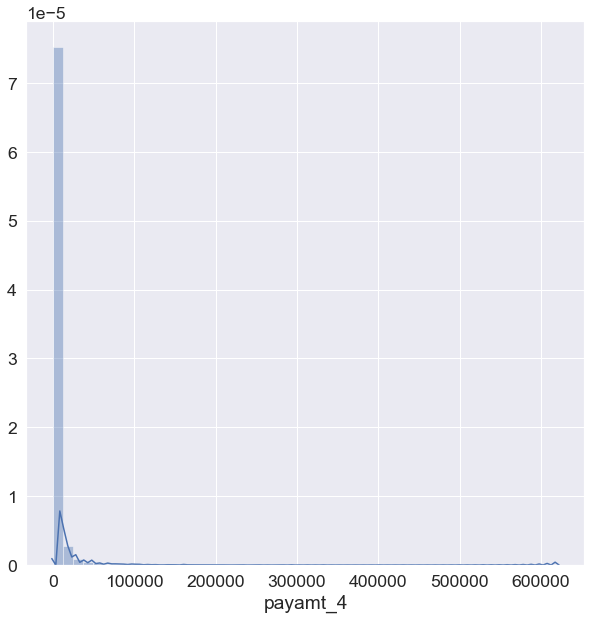

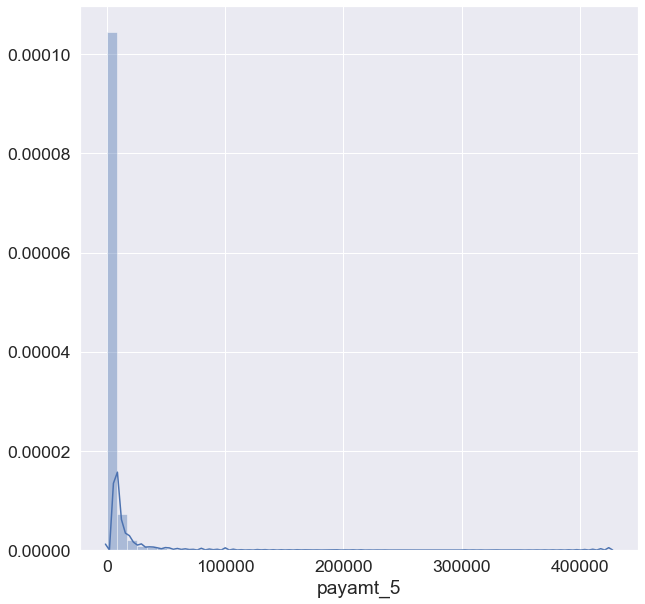

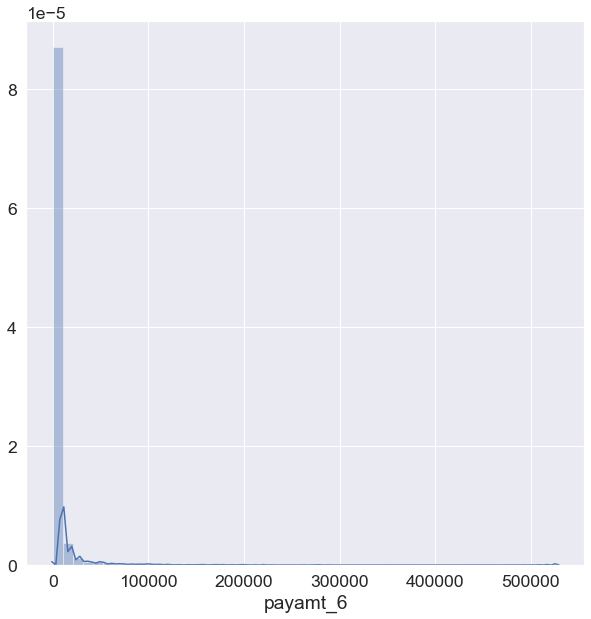

In [21]:
# ['payamt_1','payamt_2', 'payamt_3', 'payamt_4', 'payamt_5', 'payamt_6'] 
# most of the data is right skewed, scaling is required.
plt.figure(figsize = (10,10))
sns.distplot(cred['payamt_1'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['payamt_2'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['payamt_3'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['payamt_4'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['payamt_5'], kde=True)
plt.show()
plt.figure(figsize = (10,10))
sns.distplot(cred['payamt_6'], kde=True)
plt.show()

### Missing Value Treatment

In [22]:
# This means there are no missing values.
cred.isnull().sum()[cred.isnull().sum()!=0] 

Series([], dtype: int64)

In [23]:
# There are zero missing values in each columns.
cred.isnull().sum()

id                 0
limit_bal          0
sex                0
education          0
martial_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
billamt_1          0
billamt_2          0
billamt_3          0
billamt_4          0
billamt_5          0
billamt_6          0
payamt_1           0
payamt_2           0
payamt_3           0
payamt_4           0
payamt_5           0
payamt_6           0
default_payment    0
dtype: int64

### Model Building

In [24]:
cred.columns

Index(['id', 'limit_bal', 'sex', 'education', 'martial_status', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'billamt_1', 'billamt_2',
       'billamt_3', 'billamt_4', 'billamt_5', 'billamt_6', 'payamt_1',
       'payamt_2', 'payamt_3', 'payamt_4', 'payamt_5', 'payamt_6',
       'default_payment'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
cred.drop(columns = 'id', inplace = True)
cred.head()

limit_bal  sex  education  martial_status  age  pay_1  pay_2  pay_3  pay_4  \
0    20000.0    2          2               1   24      2      2     -1     -1   
1   120000.0    2          2               2   26     -1      2      0      0   
2    90000.0    2          2               2   34      0      0      0      0   
3    50000.0    2          2               1   37      0      0      0      0   
4    50000.0    1          2               1   57     -1      0     -1      0   

   pay_5  ...  billamt_4  billamt_5  billamt_6  payamt_1  payamt_2  payamt_3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   payamt_4  payamt_5  payamt_6  default_payment  
0       0.0       0.0       0.0                1  
1    1000.0       0.0    2000.0                1  
2    1000.0    1000.0    5000.0                0  
3    1100.0    1069.0    1000.0                0  
4    9000.0     689.0     679.0                0  

[5 rows x 24 columns]

In [27]:
dummy_data = pd.get_dummies(cred)
dummy_data

limit_bal  sex  education  martial_status  age  pay_1  pay_2  pay_3  \
0        20000.0    2          2               1   24      2      2     -1   
1       120000.0    2          2               2   26     -1      2      0   
2        90000.0    2          2               2   34      0      0      0   
3        50000.0    2          2               1   37      0      0      0   
4        50000.0    1          2               1   57     -1      0     -1   
...          ...  ...        ...             ...  ...    ...    ...    ...   
29995   220000.0    1          3               1   39      0      0      0   
29996   150000.0    1          3               2   43     -1     -1     -1   
29997    30000.0    1          2               2   37      4      3      2   
29998    80000.0    1          3               1   41      1     -1      0   
29999    50000.0    1          2               1   46      0      0      0   

       pay_4  pay_5  ...  billamt_4  billamt_5  billamt_6  payamt_1  payamt_2  \
0         -1     -2  ...        0.0        0.0        0.0       0.0     689.0   
1          0      0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995      0      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       payamt_3  payamt_4  payamt_5  payamt_6  default_payment  
0           0.0       0.0       0.0       0.0                1  
1        1000.0    1000.0       0.0    2000.0                1  
2        1000.0    1000.0    1000.0    5000.0                0  
3        1200.0    1100.0    1069.0    1000.0                0  
4       10000.0    9000.0     689.0     679.0                0  
...         ...       ...       ...       ...              ...  
29995    5003.0    3047.0    5000.0    1000.0                0  
29996    8998.0     129.0       0.0       0.0                0  
29997   22000.0    4200.0    2000.0    3100.0                1  
29998    1178.0    1926.0   52964.0    1804.0                1  
29999    1430.0    1000.0    1000.0    1000.0                1  

[30000 rows x 24 columns]

In [28]:
x = dummy_data.drop('default_payment', axis = 1)
y = dummy_data.default_payment

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.30, random_state = 123)

In [30]:
from scipy.stats import ttest_1samp
# H0 ==> Population and sample means are same
# H1 ==> Population and sample means are not same

In [31]:
mu_age = dummy_data['age'].mean()

In [32]:
cred.columns

Index(['limit_bal', 'sex', 'education', 'martial_status', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'billamt_1', 'billamt_2',
       'billamt_3', 'billamt_4', 'billamt_5', 'billamt_6', 'payamt_1',
       'payamt_2', 'payamt_3', 'payamt_4', 'payamt_5', 'payamt_6',
       'default_payment'],
      dtype='object')

In [33]:
cont_cols = ["limit_bal", "sex", "education", "martial_status","age", "pay_1", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "billamt_1", "billamt_2", "billamt_3", "billamt_4", "billamt_5", "billamt_6", "payamt_1", "payamt_2", "payamt_3", "payamt_4", "payamt_5", "payamt_6"]
for i in cont_cols:
    a = cred[i].mean()
    print(i)
    print(f"for training: {ttest_1samp(xtrain[i],a)}")
    print(f"for testing: {ttest_1samp(xtest[i],a)}")
    print("\n")
# Since p_value is greater than 0.05, we fail to reject the null hypothesis H0.

limit_bal
for training: Ttest_1sampResult(statistic=0.44110837876056963, pvalue=0.6591390793386124)
for testing: Ttest_1sampResult(statistic=-0.681766011156954, pvalue=0.4954044647319765)


sex
for training: Ttest_1sampResult(statistic=-0.8792197223725317, pvalue=0.3792922135752561)
for testing: Ttest_1sampResult(statistic=1.3488892849470153, pvalue=0.1774064712276252)


education
for training: Ttest_1sampResult(statistic=-0.18100968907177437, pvalue=0.8563617177589691)
for testing: Ttest_1sampResult(statistic=0.27956513786320564, pvalue=0.7798175818892878)


martial_status
for training: Ttest_1sampResult(statistic=0.5926093826530864, pvalue=0.5534489796171842)
for testing: Ttest_1sampResult(statistic=-0.9035332505266553, pvalue=0.36626713457825977)


age
for training: Ttest_1sampResult(statistic=0.24081695334381775, pvalue=0.809699340394989)
for testing: Ttest_1sampResult(statistic=-0.36713916927255597, pvalue=0.7135238442912446)


pay_1
for training: Ttest_1sampResult(statistic=0.164

In [34]:
import statsmodels.api as sm
import sklearn.linear_model as LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, cohen_kappa_score

In [35]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [36]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_xtrain = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns)
sc_xtest = pd.DataFrame(sc.fit_transform(xtest), columns = xtest.columns)

In [37]:
# Statistical Modelling
import statsmodels.api as sm
import scipy.stats as stats

X_constant = sm.add_constant(x)
reg_log = sm.Logit(y,X_constant).fit()
reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.464620
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        default_payment   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29976
Method:                           MLE   Df Model:                           23
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                  0.1207
Time:                        15:00:41   Log-Likelihood:                -13939.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6863      0.119     -5.784      0.000      -0.919      -0.454
limit_bal      -7.623e-07   1.57e-07     -4.859      0.000   -1.07e-06   -4.55e-07
sex               -0.1087      0.031     -3.541      0.000      -0.169      -0.049
education         -0.1016      0.021     -4.844      0.000      -0.143      -0.060
martial_status    -0.1544      0.032     -4.869      0.000      -0.216      -0.092
age                0.0074      0.002      4.170      0.000       0.004       0.011
pay_1              0.5774      0.018     32.632      0.000       0.543       0.612
pay_2              0.0828      0.020      4.103      0.000       0.043       0.122
pay_3              0.0721      0.023      3.192      0.001       0.028       0.116
pay_4              0.0239      0.025      0.956      0.339      -0.025       0.073
pay_5              0.0340      0.027      1.266      0.206      -0.019       0.087
pay_6              0.0080      0.022      0.363      0.716      -0.035       0.051
billamt_1      -5.492e-06   1.14e-06     -4.835      0.000   -7.72e-06   -3.27e-06
billamt_2       2.356e-06    1.5e-06      1.566      0.117   -5.92e-07     5.3e-06
billamt_3       1.365e-06   1.32e-06      1.032      0.302   -1.23e-06    3.96e-06
billamt_4      -1.821e-07   1.35e-06     -0.135      0.893   -2.83e-06    2.46e-06
billamt_5       6.155e-07   1.52e-06      0.405      0.685   -2.36e-06    3.59e-06
billamt_6       3.938e-07   1.19e-06      0.330      0.742   -1.95e-06    2.74e-06
payamt_1       -1.363e-05   2.31e-06     -5.913      0.000   -1.81e-05   -9.11e-06
payamt_2       -9.616e-06   2.09e-06     -4.590      0.000   -1.37e-05   -5.51e-06
payamt_3       -2.742e-06   1.72e-06     -1.592      0.111   -6.12e-06    6.34e-07
payamt_4       -4.023e-06   1.78e-06     -2.254      0.024   -7.52e-06   -5.25e-07
payamt_5       -3.311e-06   1.78e-06     -1.864      0.062   -6.79e-06    1.71e-07
payamt_6       -2.064e-06    1.3e-06     -1.593      0.111    -4.6e-06    4.76e-07
==================================================================================
"""

In [38]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
model_log = log.fit(sc_xtrain,ytrain)
y_pred = model_log.predict(sc_xtest)

In [39]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7052
           1       0.69      0.24      0.36      1948

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000



In [40]:
print("The accuracy of the DT model is, Accuracy = ",accuracy_score(ytest,y_pred))
print("The precison of the LR model is,  Precision = ",precision_score(ytest,y_pred))
print("The recall of the LR model is, Recall = ",recall_score(ytest,y_pred))
print("The f1score of the LR model is , F1_Score =",f1_score(ytest,y_pred))
print("The cohen's kappa score of the LR model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred))
print("The ROC_AUC score of the LR model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred))

The accuracy of the DT model is, Accuracy =  0.8125555555555556
The precison of the LR model is,  Precision =  0.6933333333333334
The recall of the LR model is, Recall =  0.2402464065708419
The f1score of the LR model is , F1_Score = 0.35684330918795276
The cohen's kappa score of the LR model is , Cohen's Kappa Score =  0.2762141753904239
The ROC_AUC score of the LR model ,ROC-AUC Score =  0.6054465158208718


In [41]:
# Applying the decision tree model
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
model_dt=dt.fit(sc_xtrain,ytrain)
y_pred2=model_dt.predict(sc_xtest)

In [42]:
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7052
           1       0.36      0.43      0.39      1948

    accuracy                           0.71      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.71      0.72      9000



In [43]:
print("The accuracy of the DT model is, Accuracy = ",accuracy_score(ytest,y_pred2))
print("The precison of the DT model is,  Precision = ",precision_score(ytest,y_pred2))
print("The recall of the DT model is, Recall = ",recall_score(ytest,y_pred2))
print("The f1score of the DT model is , F1_Score =",f1_score(ytest,y_pred2))
print("The cohen's kappa score of the DT model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred2))
print("The ROC_AUC score of the DT model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred2))

The accuracy of the DT model is, Accuracy =  0.712
The precison of the DT model is,  Precision =  0.36048526863084923
The recall of the DT model is, Recall =  0.4271047227926078
The f1score of the DT model is , F1_Score = 0.3909774436090226
The cohen's kappa score of the DT model is , Cohen's Kappa Score =  0.20414934044831834
The ROC_AUC score of the DT model ,ROC-AUC Score =  0.6089011986056062


In [44]:
# Applying Random Forest on this model.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_rf = rf.fit(sc_xtrain,ytrain)
y_pred3 = model_rf.predict(sc_xtest)

In [45]:
print("The accuracy of the RF model is, Accuracy = ",accuracy_score(ytest,y_pred3))
print("The precison of the RF model is,  Precision = ",precision_score(ytest,y_pred3))
print("The recall of the RF model is, Recall = ",recall_score(ytest,y_pred3))
print("The f1score of the RF model is , F1_Score =",f1_score(ytest,y_pred3))
print("The cohen's kappa score of the RF model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred3))
print("The ROC_AUC score of the RF model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred3))

The accuracy of the RF model is, Accuracy =  0.8168888888888889
The precison of the RF model is,  Precision =  0.6415094339622641
The recall of the RF model is, Recall =  0.3490759753593429
The f1score of the RF model is , F1_Score = 0.45212765957446804
The cohen's kappa score of the RF model is , Cohen's Kappa Score =  0.35350689383425515
The ROC_AUC score of the RF model ,ROC-AUC Score =  0.6475952763920935


In [46]:
# Applying Naive Bayes on this model.
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
model_nb = nb.fit(sc_xtrain,ytrain)
y_pred4 = model_nb.predict(sc_xtest)

In [47]:
print("The accuracy of the NB model is, Accuracy = ",accuracy_score(ytest,y_pred4))
print("The precison of the NB model is,  Precision = ",precision_score(ytest,y_pred4))
print("The recall of the NB model is, Recall = ",recall_score(ytest,y_pred4))
print("The f1score of the NB model is , F1_Score =",f1_score(ytest,y_pred4))
print("The cohen's kappa score of the NB model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred4))
print("The ROC_AUC score of the NB model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred4))

The accuracy of the NB model is, Accuracy =  0.6376666666666667
The precison of the NB model is,  Precision =  0.3404617253948967
The recall of the NB model is, Recall =  0.7191991786447639
The f1score of the NB model is , F1_Score = 0.4621474517565562
The cohen's kappa score of the NB model is , Cohen's Kappa Score =  0.23837990230170214
The ROC_AUC score of the NB model ,ROC-AUC Score =  0.6671719092316276


In [48]:
# Applying KNN on this model.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
model_knn = knn.fit(sc_xtrain,ytrain)
y_pred5 = model_knn.predict(sc_xtest)
print(classification_report(ytest,y_pred5))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7052
           1       0.47      0.36      0.41      1948

    accuracy                           0.77      9000
   macro avg       0.65      0.62      0.63      9000
weighted avg       0.76      0.77      0.76      9000



In [49]:
print("The accuracy of the NB model is, Accuracy = ",accuracy_score(ytest,y_pred5))
print("The precison of the NB model is,  Precision = ",precision_score(ytest,y_pred5))
print("The recall of the NB model is, Recall = ",recall_score(ytest,y_pred5))
print("The f1score of the NB model is , F1_Score =",f1_score(ytest,y_pred5))
print("The cohen's kappa score of the NB model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred5))
print("The ROC_AUC score of the NB model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred5))

The accuracy of the NB model is, Accuracy =  0.7745555555555556
The precison of the NB model is,  Precision =  0.4726166328600406
The recall of the NB model is, Recall =  0.35882956878850103
The f1score of the NB model is , F1_Score = 0.4079369711117596
The cohen's kappa score of the NB model is , Cohen's Kappa Score =  0.27191364108727567
The ROC_AUC score of the NB model ,ROC-AUC Score =  0.6241113243829063


In [50]:
from sklearn.ensemble import AdaBoostClassifier
model_6 = AdaBoostClassifier(random_state=1)
model_6.fit(sc_xtrain, ytrain)
model_6.score(sc_xtest,ytest)

0.8167777777777778

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
model_7 = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_7.fit(sc_xtrain, ytrain)
model_7.score(sc_xtest,ytest)

0.8231111111111111

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_gb = gb.fit(sc_xtrain,ytrain)
y_pred8 = model_gb.predict(sc_xtest)
print(classification_report(ytest,y_pred8))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7052
           1       0.71      0.31      0.43      1948

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.66      9000
weighted avg       0.81      0.82      0.80      9000



In [53]:
print("The accuracy of the GB model is, Accuracy = ",accuracy_score(ytest,y_pred8))
print("The precison of the GB model is,  Precision = ",precision_score(ytest,y_pred8))
print("The recall of the GB model is, Recall = ",recall_score(ytest,y_pred8))
print("The f1score of the GB model is , F1_Score =",f1_score(ytest,y_pred8))
print("The cohen's kappa score of the GB model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred8))
print("The ROC_AUC score of the GB model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred8))

The accuracy of the GB model is, Accuracy =  0.8231111111111111
The precison of the GB model is,  Precision =  0.7050691244239631
The recall of the GB model is, Recall =  0.3141683778234086
The f1score of the GB model is , F1_Score = 0.43465909090909094
The cohen's kappa score of the GB model is , Cohen's Kappa Score =  0.347608480579787
The ROC_AUC score of the GB model ,ROC-AUC Score =  0.6389333097284938


                Features
limit_bal       0.059493
sex             0.011969
education       0.020165
martial_status  0.013954
age             0.066924
pay_1           0.095006
pay_2           0.045319
pay_3           0.029485
pay_4           0.022881
pay_5           0.021221
pay_6           0.021134
billamt_1       0.059613
billamt_2       0.053698
billamt_3       0.050804
billamt_4       0.049514
billamt_5       0.049163
billamt_6       0.049830
payamt_1        0.051248
payamt_2        0.047781
payamt_3        0.045856
payamt_4        0.043552
payamt_5        0.045183
payamt_6        0.046206


<Figure size 1440x1440 with 0 Axes>

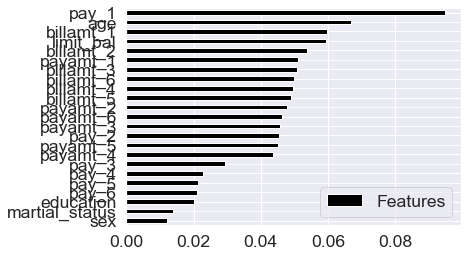

In [54]:
plt.figure(figsize = (20,20))
features = pd.DataFrame(rf.feature_importances_, index = sc_xtest.columns,
            columns = ["Features"])
features.sort_values(by = "Features").plot(kind = "barh", color = "black")
print(features)

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Logistic: 0.682109 (0.000097)
NaiveBayes: 0.374406 (0.000419)
DecisionTree: 0.730971 (0.000093)
RandomForest: 0.782254 (0.000087)
KNearest: 0.698194 (0.000108)


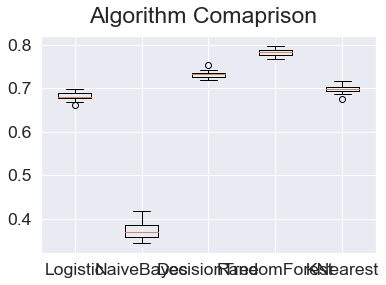

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# In KNN, n_neighors shouldn't be used 10% of the data.


LR = LogisticRegression()
NB = GaussianNB()
DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)
KNN = KNeighborsClassifier(n_neighbors=400, weights='distance')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)


models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('DecisionTree', DT))
models.append(('RandomForest', RF))
models.append(('KNearest', KNN))


# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=15, random_state=0) # model_selection.
    cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'f1_weighted' ) # model_selection.
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))
    
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comaprison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier()

GradientBoostingClassifier()

In [57]:
params = {"loss" : ['deviance', 'exponential'],   
         "max_features":["auto", "sqrt", "log2"],'criterion': ['friedman_mse', 'mse', 'mae'], 'max_leaf_nodes': [2,3,4,5],
         'min_samples_leaf': [1,2,3,4,5], 'random_state' : [0,123,234,1,5,7,9,10,45]}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, shuffle= True)

In [59]:
random_cv = RandomizedSearchCV(estimator=gb,param_distributions=params, cv=kfold, n_iter=25, 
scoring = "f1_weighted",random_state=42)
random_cv.fit(sc_xtrain, ytrain)
print(random_cv.best_params_)

KeyboardInterrupt: 

How does the probability of default payment vary by categories of different demographic variables?

From the visualizations we can see that as per gender, female are more of the defaulters than male.
Also most of the defaulters are university level graduates who mostly are in their late twenties i.e. (26-29) years of age.
This could be possible because of pursuing further studies or perhaps more unemployment being there in this age bracket in Taiwan.

Which variables are the strongest predictors of default payment?

Pay_1, Age, Bill_Amount1 and Limit_ Balance are the strongest predictors for default payment.